# Artificial Intelligence I: Introduction to Data Science and Machine Learning
# Chapter 4: Time Series & Anomaly Detection
# Daily Climate
* https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../../data/daily_climate/DailyDelhiClimateTrain.csv')
df_test = pd.read_csv('../../data/daily_climate/DailyDelhiClimateTest.csv')

print(df_train.shape)
print(df_test.shape)

(1462, 5)
(114, 5)


In [3]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


# EDA

In [5]:
df_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [6]:
df_test.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


# Handle Missing Values

In [9]:
df_train.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [10]:
df_test.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

# Set index to Datetime

In [11]:
df_train['date'] = pd.to_datetime(df_train['date'])

df_train.sort_values(by=['date'], inplace=True)
df_train.set_index(df_train['date'], inplace=True)
df_train.drop('date', axis=1, inplace=True)
df_train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [12]:
df_test['date'] = pd.to_datetime(df_test['date'])

df_test.sort_values(by=['date'], inplace=True)
df_test.set_index(df_test['date'], inplace=True)
df_test.drop('date', axis=1, inplace=True)
df_test.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


# Visualization

<Axes: title={'center': 'Mean Temperature Over Time'}, xlabel='date'>

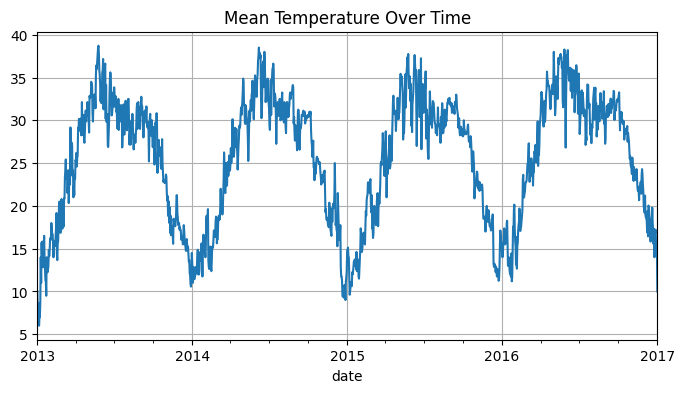

In [13]:
df_train['meantemp'].plot(title='Mean Temperature Over Time', figsize=(8, 4), grid='on')

<Axes: title={'center': 'Humidity'}, xlabel='date'>

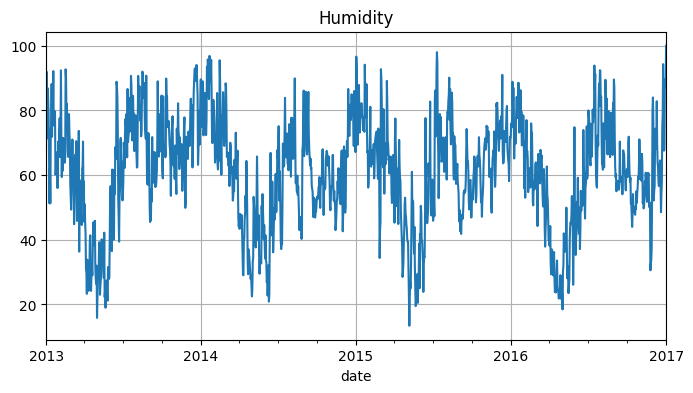

In [14]:
df_train['humidity'].plot(title='Humidity', figsize=(8, 4), grid='on')

<Axes: title={'center': 'Wind Speed'}, xlabel='date'>

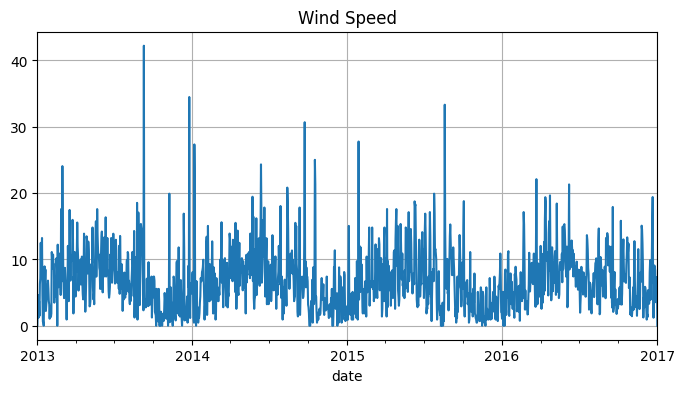

In [15]:
df_train['wind_speed'].plot(title='Wind Speed', figsize=(8, 4), grid='on')

<Axes: title={'center': 'Mean Pressure Over Time'}, xlabel='date'>

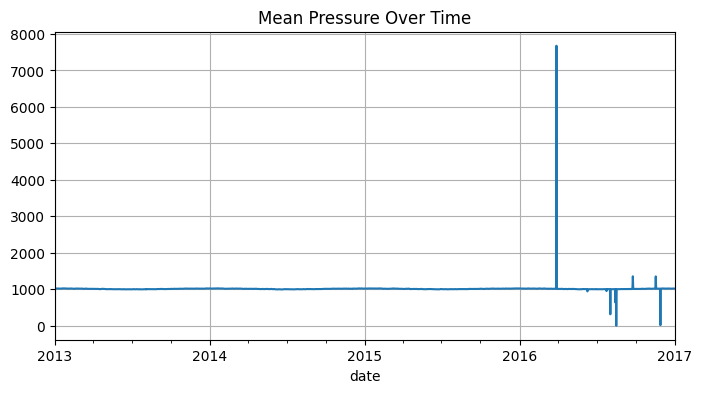

In [16]:
df_train['meanpressure'].plot(title='Mean Pressure Over Time', figsize=(8, 4), grid='on')

# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
train_scaler = StandardScaler()
test_scaler = StandardScaler()

features_to_scale = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

train_scaler.fit(df_train[features_to_scale])
test_scaler.fit(df_test[features_to_scale])

StandardScaler()

### Scaled Visualization

<Axes: title={'center': 'Mean Temperature Over Time'}, xlabel='date'>

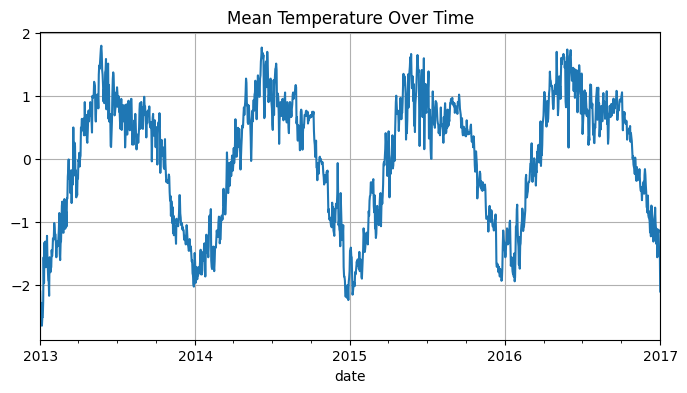

In [19]:
df_train[features_to_scale] = train_scaler.transform(df_train[features_to_scale])
df_train['meantemp'].plot(title='Mean Temperature Over Time', figsize=(8, 4), grid='on')

<Axes: title={'center': 'Mean Pressure Over Time'}, xlabel='date'>

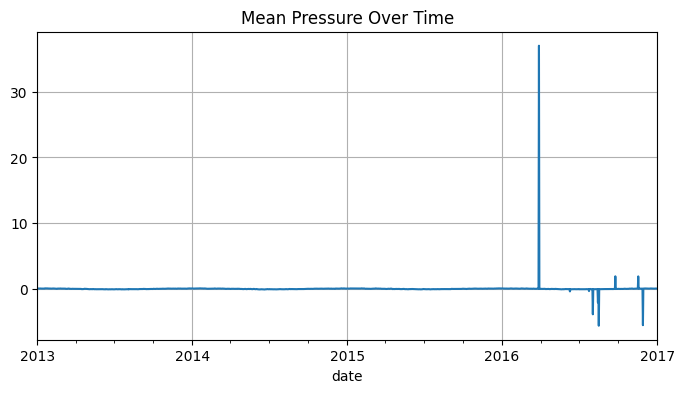

In [20]:
df_train['meanpressure'].plot(title='Mean Pressure Over Time', figsize=(8, 4), grid='on')

# Interquantile Range (IQR) AD
* $IQR = Q_3 - Q_1$
* Normal range: $[Q_1 - c \times IQR, Q_3 + c \times IQR]$

![IQR](IQR_Gaussian_PDF.png "IQE")

In [21]:
q_3 = df_train['meanpressure'].quantile(0.75)
q_1 = df_train['meanpressure'].quantile(0.25)
iqr = q_3 - q_1

# default 1.5
c = 3.0
upper_threshold = q_3 + c*iqr
lower_threshold = q_1 + c*iqr

print(f'Upper threshold: {upper_threshold:.4f}')
print(f'Lower threshold: {lower_threshold:.4f}')

df_train['anomalies_meanpressure'] = (df_train['meanpressure'] < -lower_threshold) | (df_train['meanpressure'] > upper_threshold)
df_train['anomalies_meanpressure'] = df_train['anomalies_meanpressure'].apply(int)

df_train['anomalies_meanpressure'].value_counts()

Upper threshold: 0.2438
Lower threshold: 0.1697


anomalies_meanpressure
0    1453
1       9
Name: count, dtype: int64

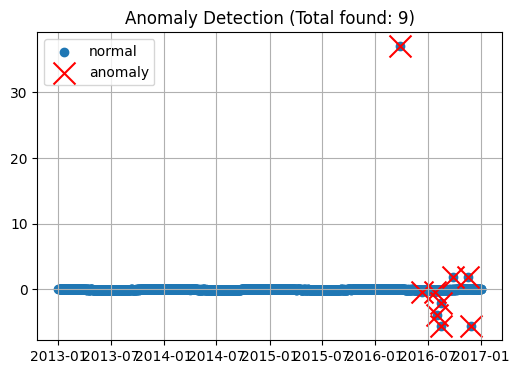

In [22]:
df_anomaly_points_meanpressure = df_train[df_train['anomalies_meanpressure'] == 1]

total_anomalies_meanpressure = len(df_anomaly_points_meanpressure)

plt.figure(figsize=(6, 4))
plt.grid('on')

plt.scatter(df_train.index, df_train['meanpressure'], label='normal')
plt.scatter(df_anomaly_points_meanpressure.index, df_anomaly_points_meanpressure['meanpressure'], s=250, c='red', marker='x', label='anomaly')
plt.title(f'Anomaly Detection (Total found: {total_anomalies_meanpressure})')
plt.legend()

### IQR as Function

In [23]:
def calculate_iqr(dataframe, feature_column_name, anomaly_column_name, c):
    q_3 = dataframe[feature_column_name].quantile(0.75)
    q_1 = dataframe[feature_column_name].quantile(0.25)
    iqr = q_3 - q_1
    
    upper_threshold = q_3 + c*iqr
    lower_threshold = q_1 + c*iqr
    
    print(f'Upper threshold: {upper_threshold:.4f}')
    print(f'Lower threshold: {lower_threshold:.4f}')
    
    dataframe[anomaly_column_name] = (dataframe[feature_column_name] < -lower_threshold) | (dataframe[feature_column_name] > upper_threshold)
    dataframe[anomaly_column_name] = dataframe[anomaly_column_name].apply(int)

    return dataframe


def plot_anomalies(dataframe, feature_column_name, anomaly_column_name):
    df_anomaly_points = dataframe[dataframe[anomaly_column_name] == 1]
    
    total_anomalies = len(df_anomaly_points)
    
    plt.figure(figsize=(12, 6))
    plt.grid('on')
    
    plt.scatter(dataframe.index, dataframe[feature_column_name], label='normal')
    plt.scatter(df_anomaly_points.index, df_anomaly_points[feature_column_name], s=250, c='red', marker='x', label='anomaly')
    plt.title(f'Anomaly Detection (Total found: {total_anomalies})')
    plt.legend()


def detect_anomalies(dataframe, feature_column_name, anomaly_column_name, c):
    dataframe = calculate_iqr(dataframe, feature_column_name, anomaly_column_name, c)
    plot_anomalies(dataframe, feature_column_name, anomaly_column_name)

Upper threshold: 0.3922
Lower threshold: 0.3180


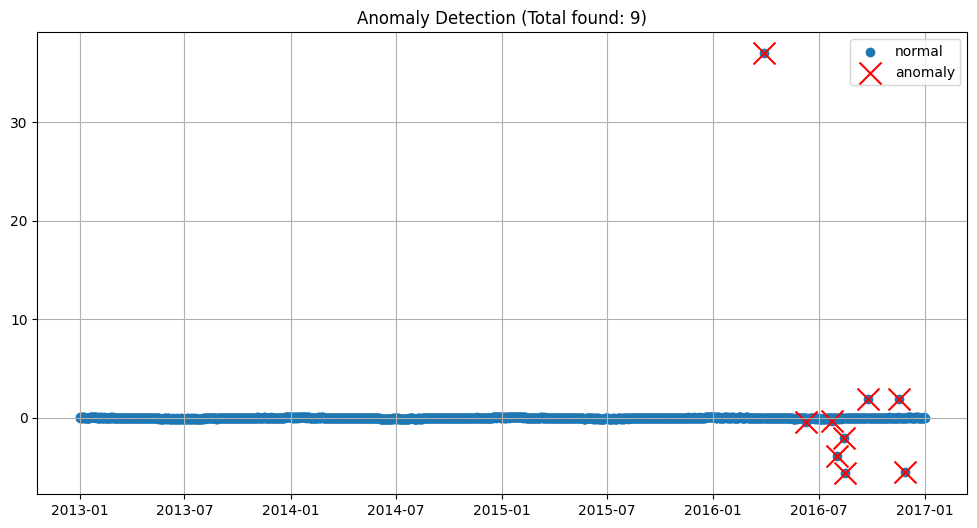

In [24]:
detect_anomalies(
    df_train,
    'meanpressure',
    'anomalies_meanpressure',
    5.0
)

# Autocorrelation Function (ACF)
* ACF is often used to identify the order of the moving average (MA) component in a time series model

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

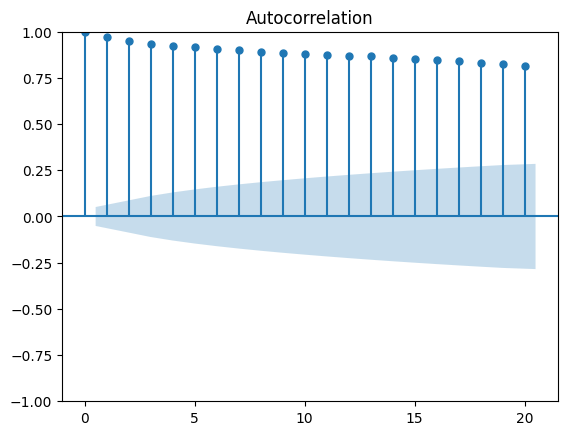

In [26]:
_ = plot_acf(df_train['meantemp'], lags=20)

### ACF of Noise

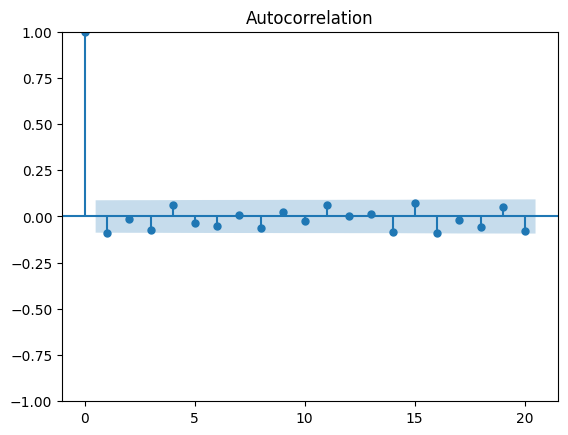

In [27]:
noise = np.random.normal(loc=0, scale=1, size=500)
_ = plot_acf(noise, lags=20)

# Partial Autocorrelation Function (PACF)
* PACF is typically used to identify the order of the autoregressive (AR) component in a time series model

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf

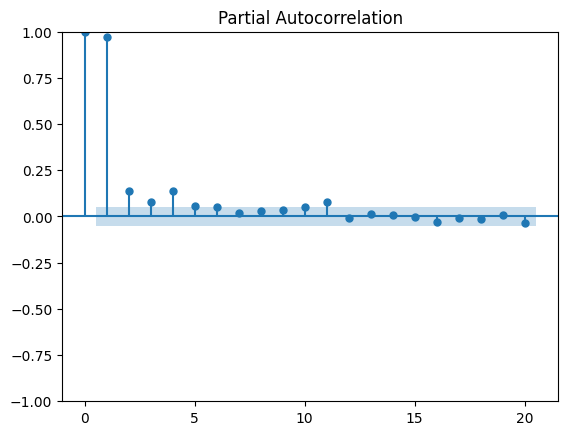

In [29]:
_ = plot_pacf(df_train['meantemp'].values, lags=20)

### PACF of Noise

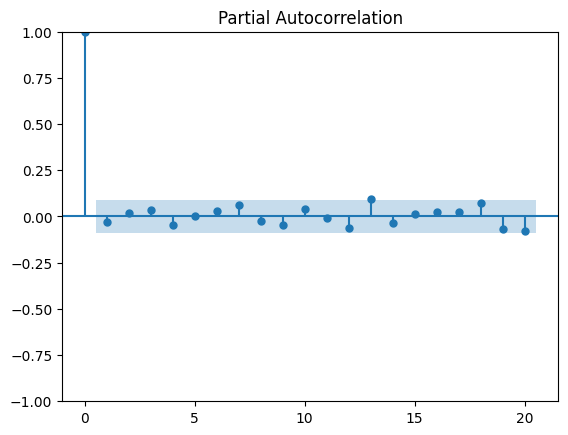

In [30]:
noise = np.random.normal(loc=0, scale=1, size=500)
_ = plot_pacf(noise, lags=20);

# Stationary Test

In [31]:
# INSTALL 
#!pip install statsmodels

from statsmodels.tsa.stattools import adfuller

In [32]:
result = adfuller(df_train['meantemp'].values)
result

(-2.0210690559206497,
 0.27741213723017044,
 10,
 1451,
 {'1%': -3.4348647527922824,
  '5%': -2.863533960720434,
  '10%': -2.567831568508802},
 -307.1477484545653)

In [33]:
p_value = result[1]

print(f'P-Value: {p_value:.4f}')

if p_value < 0.05:
    print('Stationary')
else:
    print('Non-Stationary')

P-Value: 0.2774
Non-Stationary


# Differencing (Integration)

<Axes: title={'center': 'Mean Temperature Over Time'}, xlabel='date'>

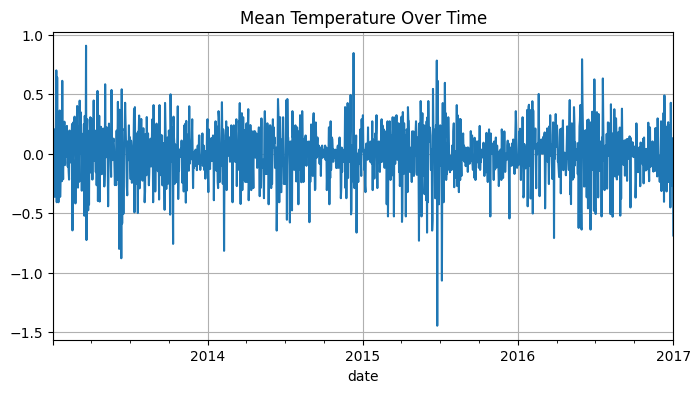

In [34]:
df_train['meantemp'].diff(periods=1).dropna().plot(title='Mean Temperature Over Time', figsize=(8, 4), grid='on')

In [35]:
result = adfuller(df_train['meantemp'].diff(periods=1).dropna().values)

p_value = result[1]

print(f'P-Value: {p_value:.4f}')

if p_value < 0.05:
    print('Stationary')
else:
    print('Non-Stationary')

P-Value: 0.0000
Stationary


<Axes: title={'center': 'Humidity'}, xlabel='date'>

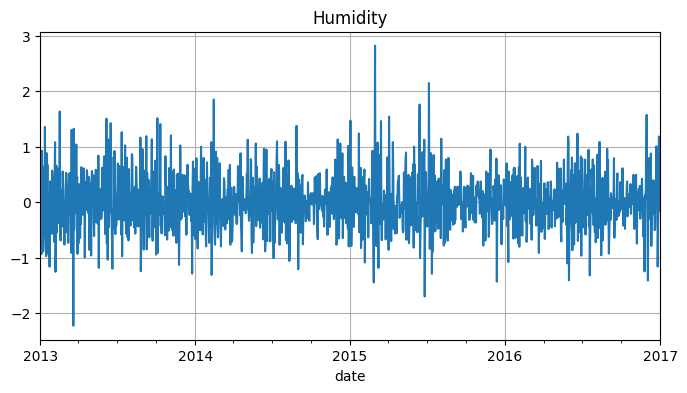

In [36]:
df_train['humidity'].diff(periods=1).plot(title='Humidity', figsize=(8, 4), grid='on')

In [37]:
result = adfuller(df_train['humidity'].diff(periods=1).dropna().values)

p_value = result[1]

print(f'P-Value: {p_value:.4f}')

if p_value < 0.05:
    print('Stationary')
else:
    print('Non-Stationary')

P-Value: 0.0000
Stationary


# Seasonal Decomposition
* additive: $y_t = T_t + S_t + R_t$
* multiplicative: $y_t = T_t * S_t * R_t$
* $T_t$ trend component
* $S_t$ seasonal component
* $R_t$ residual component
### Decomposition Implement from Scratch

In [38]:
df_train_sd = df_train.copy()

### Trend

In [39]:
window_size = 10
df_train_sd['trend'] = df_train_sd['meantemp'].rolling(window=window_size, center=True, min_periods=1).mean()

In [40]:
df_train_sd['detrended'] = df_train_sd['meantemp'] - df_train_sd['trend'] 

### Seasonality

In [41]:
seasonality_interval = df_train_sd.index.day
#seasonality_interval = df_train_sd.index.month

df_train_sd['seasonality_interval'] = seasonality_interval

df_train_sd['seasonality'] = df_train_sd[['meantemp','seasonality_interval']].groupby('seasonality_interval').transform('mean')

### Residual

In [42]:
df_train_sd['residual'] = df_train_sd['detrended'] - df_train_sd['seasonality']

<Axes: title={'center': 'Residual'}, xlabel='date'>

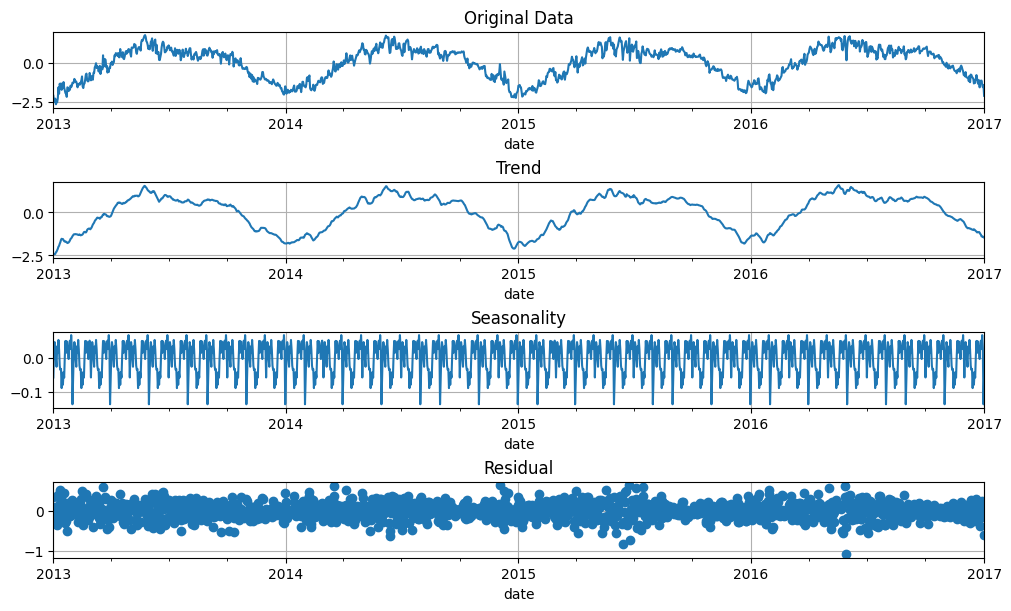

In [43]:
figure, axes = plt.subplots(nrows=4, ncols=1, constrained_layout=True)
figsize = (10, 6)

df_train_sd['meantemp'].plot(ax=axes[0], figsize=figsize, grid='on', title='Original Data')
df_train_sd['trend'].plot(ax=axes[1], figsize=figsize, grid='on', title='Trend')
df_train_sd['seasonality'].plot(ax=axes[2], figsize=figsize, grid='on', title='Seasonality')
df_train_sd['residual'].plot(ax=axes[3], figsize=figsize, grid='on', title='Residual', marker='o', linestyle='none')

### Function

In [44]:
def seasonal_decompose(dataframe, column, trend_window, seasonality_interval, detrend=True, plot=True, figsize=(10, 6)):
    
    _, p, _, _, _, _ = adfuller(dataframe[column], autolag='AIC')

    print(f'dickey-fuller test p: {p:.4f}')
    
    if detrend:
        # Trend
        dataframe['trend'] = dataframe[column].rolling(window=trend_window, center=True, min_periods=1).mean()
        # Detrend
        dataframe['detrended'] = dataframe[column] - dataframe['trend']
    else:
        dataframe['detrended'] = dataframe[column].copy()
    
    # Seasonality
    dataframe['seasonality_interval'] = seasonality_interval
    dataframe['seasonality'] = dataframe.groupby('seasonality_interval')['detrended'].transform('mean')
    # Deseasonal
    dataframe['residual'] = dataframe['detrended'] - dataframe['seasonality']
    
    if plot:
        if detrend:
            figure, axes = plt.subplots(nrows=4, ncols=1, constrained_layout=True)

            dataframe[column].plot(ax=axes[0], figsize=figsize, grid='on', title='Original Data')
            dataframe['trend'].plot(ax=axes[1], figsize=figsize, grid='on', title='Trend')
            dataframe['seasonality'].plot(ax=axes[2], figsize=figsize, grid='on', title='Seasonality')
            dataframe['residual'].plot(ax=axes[3], figsize=figsize, grid='on', title='Residual', marker='o', linestyle='none')
        else:
            figure, axes = plt.subplots(nrows=3, ncols=1, constrained_layout=True)

            dataframe[column].plot(ax=axes[0], figsize=figsize, grid='on', title='Original Data')
            dataframe['seasonality'].plot(ax=axes[1], figsize=figsize, grid='on', title='Seasonality')
            dataframe['residual'].plot(ax=axes[2], figsize=figsize, grid='on', title='Residual', marker='o', linestyle='none')
    

### Seasonal Decomposition on Humidity

dickey-fuller test p: 0.0045


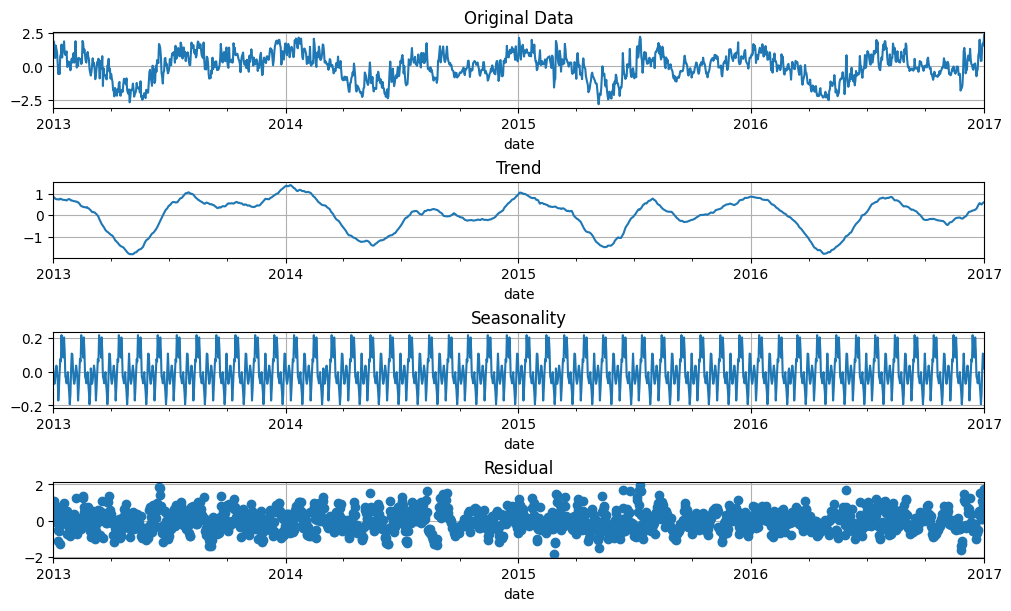

In [45]:
df_train_sd = df_train.copy()

seasonal_decompose(df_train_sd, 'humidity', trend_window=50, seasonality_interval=df_train_sd.index.day)

### Using statsmodels Library

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

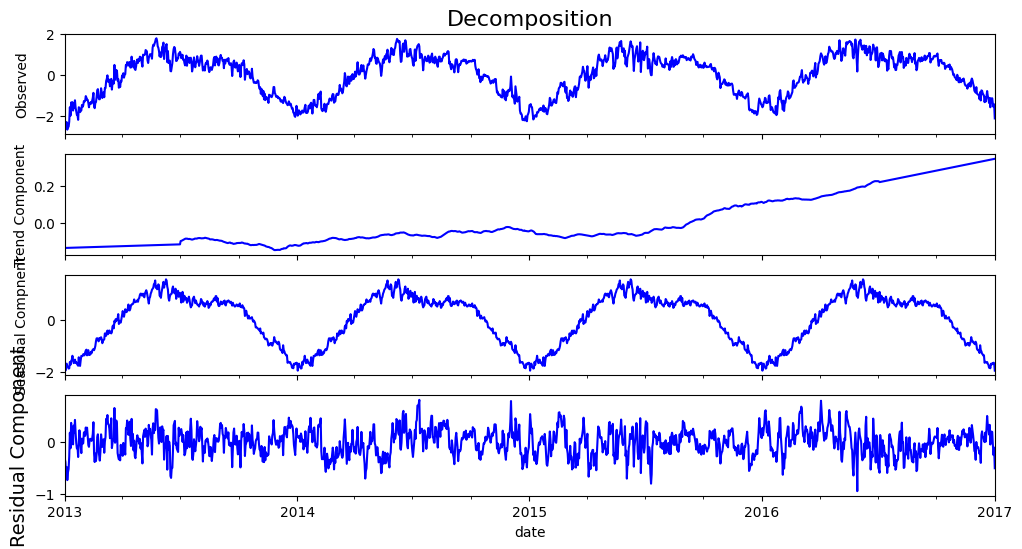

In [47]:
decomposition = seasonal_decompose(df_train['meantemp'], period = 365, model='additive', extrapolate_trend='freq')

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12, 6))


ax[0].set_title('Decomposition', fontsize=16)
decomposition.observed.plot(ax=ax[0], color='b')
ax[0].set_ylabel('Observed')

decomposition.trend.plot(ax=ax[1], color='b')
ax[1].set_ylabel('Trend Component')

decomposition.seasonal.plot(ax=ax[2], color='b')
ax[2].set_ylabel('Seasonal Compnent')

decomposition.resid.plot(ax=ax[3], legend=False, color='b')
ax[3].set_ylabel('Residual Component', fontsize=14)

plt.show()

# Seasonal AD

In [48]:
resid_data = {
    'observed': decomposition.observed,
    'resid': decomposition.resid
}

df_seasonal_ad = pd.DataFrame(resid_data)
df_seasonal_ad.head()

,observed,resid
date,,
2013-01-01,-2.109500,-0.325721
2013-01-02,-2.463454,-0.390790
2013-01-03,-2.495219,-0.614437
2013-01-04,-2.291015,-0.487085
2013-01-05,-2.654044,-0.740792


Upper threshold: 0.8469
Lower threshold: 0.5088


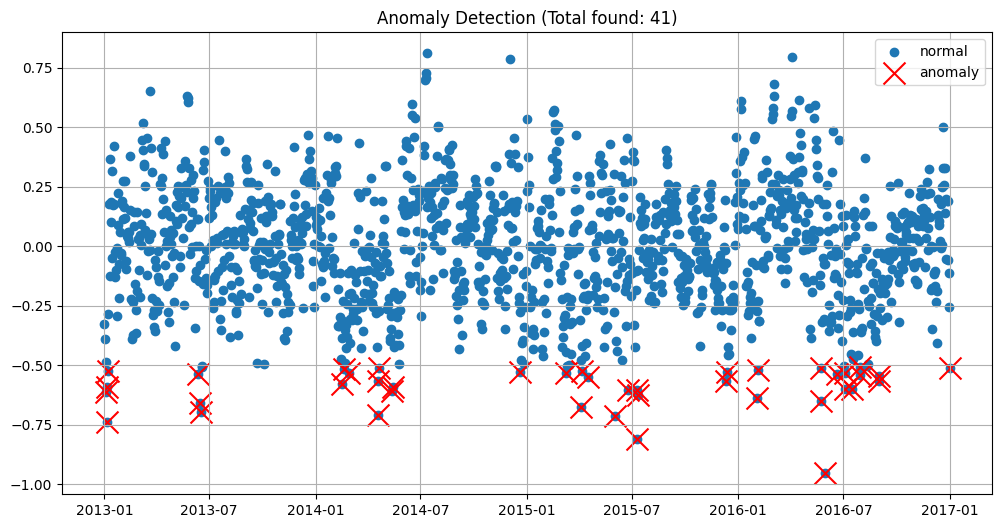

In [49]:
detect_anomalies(
    df_seasonal_ad,
    'resid',
    'anomalies_resid',
    2.0
)

### Functions (for Seasonal AD)

In [50]:
def plot_anomalies_seasonal(dataframe, feature_column_name, anomaly_column_name, observed_column_name):
    df_anomaly_points = dataframe[dataframe[anomaly_column_name] == 1]
    
    total_anomalies = len(df_anomaly_points)
    
    plt.figure(figsize=(12, 6))
    plt.grid('on')

    #########################################################
    plt.scatter(dataframe.index, dataframe[observed_column_name], label='normal')
    #########################################################
    plt.scatter(df_anomaly_points.index, df_anomaly_points[observed_column_name], s=250, c='red', marker='x', label='anomaly')
    plt.title(f'Anomaly Detection (Total found: {total_anomalies})')
    plt.legend()


def detect_anomalies_seasonal(dataframe, feature_column_name, anomaly_column_name, observed_column_name, c):
    dataframe = calculate_iqr(dataframe, feature_column_name, anomaly_column_name, c)
    plot_anomalies_seasonal(dataframe, feature_column_name, anomaly_column_name, observed_column_name)

Upper threshold: 0.8469
Lower threshold: 0.5088


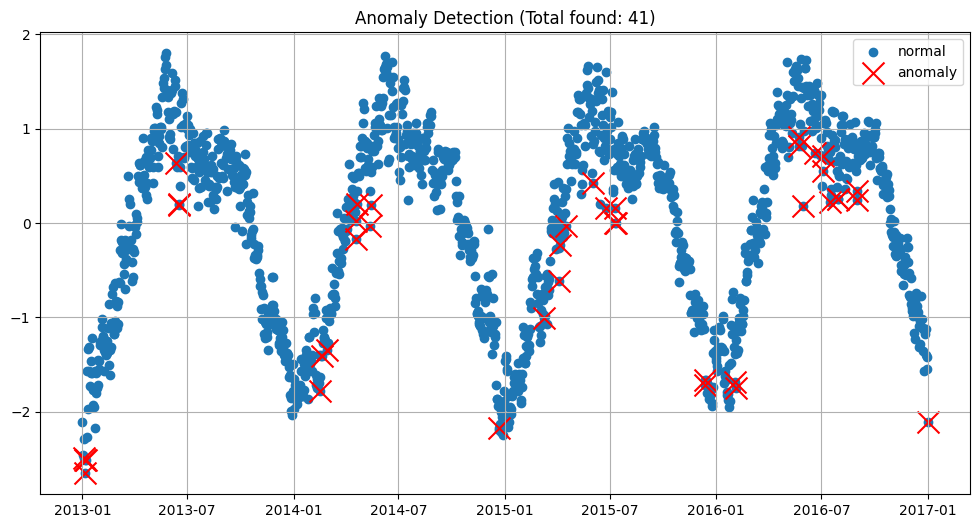

In [51]:
detect_anomalies_seasonal(
    df_seasonal_ad,
    'resid',
    'anomalies_resid',
    'observed',
    2.0
)

# ARIMA (Autoregressive Integrated Moving Average) Model
* order: (p, d, q)
* p: Order of AR
* d: Order of Differencing (Integration)
* q: Order of MA
* (p, 0, 0) -> pure AR model
* (p, d, 0) -> AR with Differencing (Integration)
* (p, d, q) -> full ARIMA model

In [52]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score 

### Rolling Forecast with ARIMA
* Move over the data and make predictions in each step

actual: -2.1095, predicted: -1.9327
actual: -1.3471, predicted: -1.1971
actual: -0.7028, predicted: -0.2033
actual: 0.2559, predicted: 0.4067
actual: 1.1772, predicted: 1.4006
actual: 0.9944, predicted: 0.9439
actual: 0.6132, predicted: 0.4867
actual: 0.5111, predicted: 0.6230
actual: -0.2230, predicted: -0.0306
Test R^2 score: 0.9341


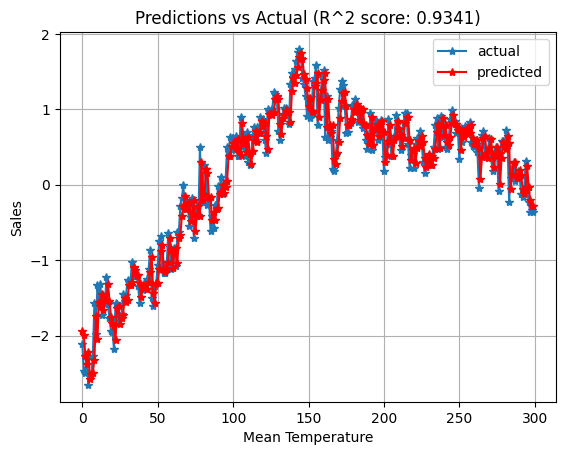

In [53]:
ROLLING_STEPS = 300
plot_interval = ROLLING_STEPS // 8

train_features = df_train['meantemp'].to_list()
test_features = df_train['meantemp'].to_list()[:ROLLING_STEPS]

prediction_history = []
# start from previous training data
# add test values step by step
actual_history = train_features

# ROLLING FORECAST
for t in range(len(test_features)):
    # order: (p, d, q)
    arima_model = ARIMA(actual_history, order=(5,1,0))
    # train ARIMA model
    arima_model_fit = arima_model.fit()
    # make a prediction for the next step
    prediction = arima_model_fit.forecast(steps=1)
    
    # save the predicted 
    prediction_history.append(prediction[0])
    
    # save the actual
    actual = test_features[t]
    # (add test values step by step)
    actual_history.append(actual)

    # plot for several intervals
    if t % plot_interval == 0:
        print(f'actual: {actual:.4f}, predicted: {prediction[0]:.4f}')


test_r2_score = r2_score(y_true=actual_history[:ROLLING_STEPS], y_pred=prediction_history)
print(f'Test R^2 score: {test_r2_score:.4f}')

plt.plot(actual_history[:ROLLING_STEPS], label = 'actual', marker = '*')
plt.plot(prediction_history, color='red', label = 'predicted', marker = '*')
plt.title(f'Predictions vs Actual (R^2 score: {test_r2_score:.4f})')
plt.xlabel('Mean Temperature')
plt.ylabel('Sales')
plt.legend()
plt.grid('on')

# Auto ARIMA
* automatically adjusts order (p, d, q) for best performance
* **NOTE: may take long time due to extensive order search**

In [54]:
# INSTALL 
#!pip install pmdarima

from pmdarima import auto_arima

### Rolling Forecast with Auto ARIMA
* Move over the data and make predictions in each step

actual: -2.1095, predicted: -1.9176
actual: -2.4952, predicted: -2.2416
actual: -2.6540, predicted: -2.1882
actual: -2.5179, predicted: -2.4511
actual: -1.5650, predicted: -2.2759
actual: -1.3316, predicted: -2.0166
actual: -1.3154, predicted: -1.6495
actual: -1.4677, predicted: -1.7321
actual: -1.2246, predicted: -1.6120
actual: -1.7692, predicted: -1.5682
Test R^2 score: 0.4660


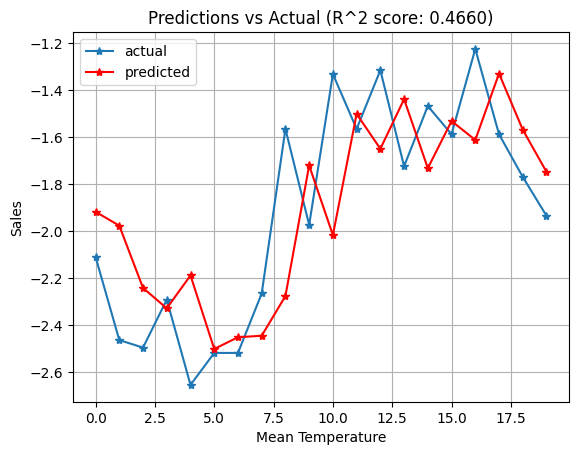

In [57]:
# NOTE: THIS IS SHORT (TAKES TOO MUCH TIME)
ROLLING_STEPS = 20
plot_interval = ROLLING_STEPS // 10

train_features = df_train['meantemp'].to_list()
test_features = df_train['meantemp'].to_list()[:ROLLING_STEPS]

prediction_history = []
# start from previous training data
# add test values step by step
actual_history = train_features

# ROLLING FORECAST
for t in range(len(test_features)):
    # start order: (start_p, d, start_q)
    # max order: (max_p, max_d, max_q)
    # train Auto ARIMA model
    # (OPTIONAL: stepwise=False, n_jobs -> use multicore CPU processing)
    auto_arima_model = auto_arima(actual_history, start_p=2, d=1, start_q=0, max_p=5, max_d=5, max_q=5)
    
    # make a prediction for the next step
    prediction = auto_arima_model.predict(n_periods=1)
    
    # save the predicted 
    prediction_history.append(prediction[0])
    
    # save the actual
    actual = test_features[t]
    # (add test values step by step)
    actual_history.append(actual)

    # plot for several intervals
    if t % plot_interval == 0:
        print(f'actual: {actual:.4f}, predicted: {prediction[0]:.4f}')


test_r2_score = r2_score(y_true=actual_history[:ROLLING_STEPS], y_pred=prediction_history)
print(f'Test R^2 score: {test_r2_score:.4f}')

plt.plot(actual_history[:ROLLING_STEPS], label = 'actual', marker = '*')
plt.plot(prediction_history, color='red', label = 'predicted', marker = '*')
plt.title(f'Predictions vs Actual (R^2 score: {test_r2_score:.4f})')
plt.xlabel('Mean Temperature')
plt.ylabel('Sales')
plt.legend()
plt.grid('on')

In [58]:
print('Last order:', auto_arima_model.order)

Last order: (3, 1, 1)


# See Also:
* Seasonal Auto Regressive Integrated Moving Average (SARIMA)
* SARIMA with Exogenous Variables (SARIMAX)
* Vector Auto-Regression (VAR)
* Vector Moving Average (VMA)
* Vector Auto Regression Moving Average (VARMA)
* VARMA with Exogenous Variables (VARMAX)
